# The Binomial Model

The usefulness of the Binomial model depends on its ability to provide a reasonable representation of the stock price distribution.

## The Random Walk Model

Imagine flipping a coin repeatedly. Let the random variable $Y$ denote the outcome of the flip. If the coin lands a head, $Y = 1$. If the coin lands a tail, $Y = -1$. If the probability of a head is $50\%$, we say it is a fair coin. After $n$ flips, with the $i^{th}$ flip denoted $Y_{i}$, the cumulative total, $Z_{n}$, is

$$Z_{n} = \sum\limits_{i=1}^{n} Y_{i}$$

The more times we flip, on average, the farther we will move from where we start. If you get a head on the first flip you move to $+1$, and as far as the remaining flips are concerned, *this is your new starting point*. After the second flip, you will either be at $0$ or $+2$. If you are a zero it is like starting over, however, if you are at $+2$, you are starting at $+2$. Continuing in this way, your average distance form the starting point increases with the number of flips.

Another way to represent the process followed by $Z_{n}$ is in terms of the *change* in $Z_{n}$:

$$Z_{n} - Z_{n-1} = Y_{n}$$

We can represent this more explicitly as

$$\mbox{Heads:} \quad Z_{n} - Z_{n-1} = +1$$

$$\mbox{Tails:} \quad Z_{n} - Z_{n-1} = -1$$

With heads the change is $+1$ and with tails the change is $-1$. This is a simple version of a random walk.

The idea that prices should follow a random walk was introduced by Samuelson (1965). In efficient markets, an asset price should reflect all available information. By definition, new information is a surprise. In response to new information the price is equally likely to move up or down, as with a coin flip. The price after a period of time is the initial price plus the cumulative up and down movements due to informational surprises.

## Modeling Stock Prices as Random Walks

The idea that stock prices should move up or down makes sense; however, the description of a random walk in the previous section is not a satisfactory description of stock price movements. Suppose we take the random walk model literally. Assume the beginning stock price is $\$100$, and the stock price will move up or down $\$1$ each time we flip the coin (get an informational surprise). There are at least three problems with this model:

1. If by chance we get enough cumulative down movements, the stock price will become negative. Stockholders have limited liability, so a stock price should never be negative.
2. The magnitude of the move ($\$1$) should depend upon how quickly the coin flips occur and the level of the stock price. If we flip coins once a second, $\$1$ moves are excessive; in real life, a $\$100$ stock will not typically have $60$ $\$1$ up or down moves in $1$ minute. Also, if a $\$1$ move is appropriate for a $\$100$ stock, it likely isn't appropriate for a $\$5$ stock.
3. The stock on average should have a positive return. The random walk model taken literally does not permit this.

Let's simulate a simple random walk after this model:

In [1]:
%matplotlib inline

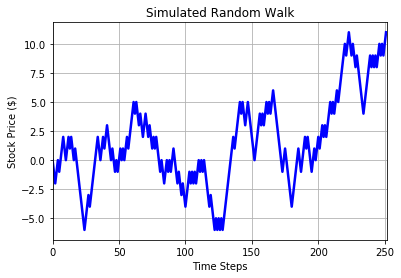

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def SimulateBinom(S, r, v, T, h):
    np.random.seed() #12345 #5555
    n = int(T / h) 
    prob = np.random.uniform(0, 1, n)
    spot = np.zeros((n,))
    u = np.exp((r * h) + v * np.sqrt(h))
    d = np.exp((r * h) - v * np.sqrt(h))
    spot[0] = S

    for t in range(1, n):
        if prob[t] >= 0.5:
            spot[t] = spot[t-1] + 1
        else:
            spot[t] = spot[t-1] - 1

    return spot

## Main
## See Figure 11.5 in McDonald text on page 332
S = 0
r = 0.10
v = 0.3
T = 1.0
h = T / 252.0 

spot = SimulateBinom(S, r, v, T, h) 
t = range(int(T / h))

plt.plot(spot, 'b', linewidth=2.5)
plt.title("Simulated Random Walk")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price ($)")
plt.xlim((0,252))
plt.grid(True)
plt.show()

Here is Figure 11.5 from the textbook:

<img src="Images/11.jpg">

It turns out that the Binomial model is a variant of the random walk model that solves all of these problems at once. The Binomial model assumes that *continuously compounded returns are a random walk with drift*.

## The Binomial Tree and Lognormality

The Binomial model stock price dynamics follows:

$$S_{t+h} = S_{t} e^{(r - \delta) h \pm \sigma \sqrt{h}}$$

Taking logs, we obtain

$$\ln{(S_{t+h} / S_{t})} = (r-\delta)h \pm \sigma \sqrt{h}$$

Since $\ln{(S_{t+h} / S_{t})}$ is the continuously compounded return from $t$ to $t+h$, $r_{t,t+h}$, the Binomial model is simply a particular way to model the continuously compounded return. That return has two parts:

- one is $[(r - \delta)h]$
- the other is uncertain $(\pm \sigma \sqrt{h})$ (generates the up and down prices)

Let's see how the Binomial model solves all three problems with the random walk model:

1. The stock price cannot become negative. Even if we move down the Binomial tree many times in a row, the resulting large, negative, continuously compounded return will give us a positive price.
2. As stock price moves occur more frequently, $h$ gets smaller, therefore up and down moves get smaller. By construction, annual volatility is the same no matter how many Binomial periods there are. Since returns follow a random walk, the percentage price change is the same whether the stock price is $\$100$ or $\$5$.
3. There is a $(r - \delta)h$ term, and we can choose the probability of an up move, so we can guarantee that the expected change in the stock price is positive.

### Lognormality

- The Binomial tree approximates a lognormal distribution, which is commonly used to model stock prices.
- The lognormal distribution is the probability distribution that arises from the assumption that continuously compounded returns on the stock are normally distributed.
- With the lognormal distribution, the stock price is positive, and the distribution is skewed to the right, that is, there is a chance that extremely high stock prices will occur.

The Binomial model implicitly assigns probabilities to the various nodes:

<img src="Images/18.jpg">





## Coding the Binomial Model for a European Option

The fact that the Binomial tree implicitly assigns probabilities to the various nodes gives us a computational strategy for implementing the Binomial model for a European option.

When we traverse the Binomial tree, we are implicitly adding up Binomial random return components of $(r - \delta)h \pm \sigma \sqrt{h}$. In the limit (as $n \rightarrow \infty$ or, the same thing, $h \rightarrow 0$), the sum of Binomial random variables is normally distributed, which means that the stock price is lognormally distributed. We will discuss this more in Chapters 18 and 20.

Suppose that a Binomial tree has $n$ periods and the risk-neutral probability of an up move is $p^{\ast}$. To reach the top node, we must go up $n$ times in a row, which occurs with a probability of $(p^{\ast})^{n}$. The price at the top node is $Su^{n}$. There is only one path through the tree by which we can reach the top node. To reach the first node below the top node, we must go up $n-1$ times and down once, for a probability of $(p^{\ast})^{n-1} \times (1 - p^{\ast})$. The price at the top node is $Su^{n-1}d$. Since the single down move can occur in any of the $n$ periods, there are $n$ ways this can happen. The probability of reaching the $i^{th}$ node below the top is $(p^{\ast})^{n-i} \times (1 - p^{\ast})^{i}$. The price at this node is $Su^{n-i}d^{i}$. The number of ways to reach this node is:

$$\mbox{Number of ways to reach $i^{th}$ node} = \frac{n!}{(n-i)!i!} = {n \choose i}$$

where $n! = n \times (n-1) \times \cdots \times 1$.

We can construct the implied probability distribution in the Binomial tree by plotting the stock price at each final period node, $Su^{n-i}d^{i}$, against the probability of reaching that node. 

The following graph compares the probability distribution for a 25-period Binomial tree with the corresponding lognormal distribution.

<img src="Images/19.jpg">

In [7]:
import numpy as np
from scipy.stats import binom

def CallPayOff(Spot, Strike):
    return np.maximum(Spot - Strike, 0.0)

def EuropeanBinomial(S, X, r, u, d, T):
    numSteps = 2
    numNodes = numSteps + 1
    spotT = 0.0
    callT = 0.0
    pu = (np.exp(r*T) - d) / (u - d)
    pd = 1 - pu
    
    for i in range(numNodes):
        spotT = S * (u ** (numSteps - i)) * (d ** (i))
        callT += CallPayOff(spotT, X) * binom.pmf(numSteps - i, numSteps, pu)  
    callPrice = callT * np.exp(-r * T)
     
    return callPrice
        
def main():
    S = 41
    X = 40
    r = 0.08
    T = 1.0
    v = 0.30
    u = 1.2
    d = 0.8
    
    callPrice = EuropeanBinomial(S, X, r, u, d, T)
    print("The Two Period European Binomial Price is = {0:.4f}".format(callPrice))
                                                
main()                                                              

The Two Period European Binomial Price is = 8.8157
